In [216]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mlxtend.classifier import StackingClassifier

labelencoder = preprocessing.LabelEncoder()
scalerminmax = preprocessing.MinMaxScaler()
#scalerstandard = preprocessing.StandardScaler()
scalermaxabs = preprocessing.MaxAbsScaler()
data_path = 'C:/AI/day051/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')
name = df_test['name']
df_train['poi'] = df_train['poi'].astype(int)
know_y = df_train['poi']
df_train = df_train.drop(['poi'] , axis=1)
df_orig = pd.concat([df_train,df_test])
print("train:" + str(df_train.shape) + " test:" + str(df_test.shape))
df_orig.head()

train:(113, 21) test:(33, 21)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [217]:
df = df_orig
for i in range(df.shape[0]):
    if(len(df.iloc[i, 0].split()) > 1):
        df.iloc[i, 0] = df.iloc[i, 0].split()[1]
df['name'] = labelencoder.fit_transform(df['name'])
df['name'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['name'])), columns=['name'])
df['bonus'] = df['bonus'].fillna(0)
df['bonus'] = df['bonus'].clip(0, 4e6)
df['bonus'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['bonus'])), columns=['bonus'])
df['deferral_payments'] = df['deferral_payments'].fillna(0)
df['deferral_payments'] = df['deferral_payments'].clip(0, 4e6)
df['deferral_payments'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['deferral_payments'])), columns=['deferral_payments'])
df['deferred_income'] = df['deferred_income'].fillna(0)
df['deferred_income'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['deferred_income'])), columns=['deferred_income'])
df['director_fees'] = df['director_fees'].fillna(0)
df['director_fees'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['director_fees'])), columns=['director_fees'])
df.loc[df['email_address'].notna(),'email_address'] = 1
df['email_address'] = df['email_address'].fillna(0)
df['exercised_stock_options'] = df['exercised_stock_options'].fillna(0)
df['exercised_stock_options'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['exercised_stock_options'])), columns=['exercised_stock_options'])
df['expenses'] = df['expenses'].fillna(0)
df['expenses'] = df['expenses'].clip(0, 2e5)
df['expenses'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['expenses'])), columns=['expenses'])
df['from_messages'] = df['from_messages'].fillna(0)
df['from_messages'] = df['from_messages'].clip(0, 4e3)
df['from_messages'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['from_messages'])), columns=['from_messages'])
df['from_poi_to_this_person'] = df['from_poi_to_this_person'].fillna(0)
df['from_poi_to_this_person'] = df['from_poi_to_this_person'].clip(0, 4e2)
df['from_poi_to_this_person'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['from_poi_to_this_person'])), columns=['from_poi_to_this_person'])
df['from_this_person_to_poi'] = df['from_this_person_to_poi'].fillna(0)
df['from_this_person_to_poi'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['from_this_person_to_poi'])), columns=['from_this_person_to_poi'])
df['loan_advances'] = df['loan_advances'].fillna(0)
df['loan_advances'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['loan_advances'])), columns=['loan_advances'])
df['long_term_incentive'] = df['long_term_incentive'].fillna(0)
df['long_term_incentive'] = df['long_term_incentive'].clip(0, 8e6)
df['long_term_incentive'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['long_term_incentive'])), columns=['long_term_incentive'])
df['other'] = df['other'].fillna(0)
df['other'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['other'])), columns=['other'])
df['restricted_stock'] = df['restricted_stock'].fillna(0)
df['restricted_stock'] = df['restricted_stock'].clip(0, 2e7)
df['restricted_stock'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['restricted_stock'])), columns=['restricted_stock'])
df['restricted_stock_deferred'] = df['restricted_stock_deferred'].fillna(0)
df['restricted_stock_deferred'] = df['restricted_stock_deferred'].clip(-76e5, 76e5)
df['restricted_stock_deferred'] = pd.DataFrame(scalermaxabs.fit_transform(pd.DataFrame(df['restricted_stock_deferred'])), columns=['restricted_stock_deferred'])
df['salary'] = df['salary'].fillna(0)
df['salary'] = df['salary'].clip(0, 15e5)
df['salary'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['salary'])), columns=['salary'])
df['shared_receipt_with_poi'] = df['shared_receipt_with_poi'].fillna(0)
df['shared_receipt_with_poi'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['shared_receipt_with_poi'])), columns=['shared_receipt_with_poi'])
df['to_messages'] = df['to_messages'].fillna(0)
df['to_messages'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['to_messages'])), columns=['to_messages'])
df['total_payments'] = df['total_payments'].fillna(0)
df1['total_payments'] = df1['total_payments'].clip(0, 2e7)
df['total_payments'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['total_payments'])), columns=['total_payments'])
df['total_stock_value'] = df['total_stock_value'].fillna(0)
df['total_stock_value'] = df['total_stock_value'].clip(0, 6e7)
df['total_stock_value'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df['total_stock_value'])), columns=['total_stock_value'])
df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,0.5125,0.4375,0.0,0.874812,0.0,1,0.063491,0.23475,0.00450,0.1050,...,0.0,0.202126,0.004098,0.137418,0.0,0.280424,0.156493,0.059740,0.001630,0.375709
1,0.3750,1.0000,0.0,1.000000,0.0,1,0.061745,0.14668,0.02700,0.2200,...,0.0,0.240000,0.000518,0.342184,0.0,0.740839,0.369861,0.239422,0.028019,0.434895
2,0.7375,0.0500,0.0,0.999851,0.0,1,0.005210,0.11442,0.00975,0.0325,...,0.0,0.000000,0.036874,0.043461,0.0,0.141229,0.016483,0.014852,0.006467,0.041560
3,0.6250,0.2000,0.0,1.000000,0.0,1,0.000000,0.59067,0.00000,0.0000,...,0.0,0.075334,0.021269,0.049252,0.0,0.149537,0.000000,0.000000,0.008560,0.016417
4,0.1000,0.3125,0.0,0.990623,0.0,1,0.000000,0.17909,0.03600,0.4975,...,0.0,0.046913,0.000011,0.006301,0.0,0.160126,0.396305,0.171496,0.005290,0.002100


In [218]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df[:13], know_y[:13], test_size=0.2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df[13:113], know_y[13:], test_size=0.2)
x_train = np.concatenate((x_train1, x_train2))
x_test = np.concatenate((x_test1, x_test2))
y_train = np.concatenate((y_train1, y_train2))
y_test = np.concatenate((y_test1, y_test2))
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=20,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(lr_pred)
acc = metrics.accuracy_score(y_test, lr_pred)
print("Acuuracy: ", acc)
gdbt.fit(x_train, y_train)
gdbt_pred = gdbt.predict(x_test)
print(gdbt_pred)
acc = metrics.accuracy_score(y_test, gdbt_pred)
print("Acuuracy: ", acc)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(rf_pred)
acc = metrics.accuracy_score(y_test, rf_pred)
print("Acuuracy: ", acc)
meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.70, n_estimators=50, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
lr_stack = LogisticRegression()
stacking = StackingClassifier(classifiers=[lr, gdbt, rf], meta_classifier=lr_stack)
stacking.fit(x_train, y_train)
stacking_pred = stacking.predict(x_test)
acc = metrics.accuracy_score(y_test, stacking_pred)
print("Acuuracy: ", acc)

C:\Users\howard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Acuuracy:  0.8695652173913043
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Acuuracy:  0.8695652173913043
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Acuuracy:  0.9130434782608695


C:\Users\howard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acuuracy:  0.8260869565217391


C:\Users\howard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [215]:
x_train = df[0:113]
y_train = know_y
x_test = df[113:]
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=20,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)
lr.fit(x_train, y_train)
gdbt.fit(x_train, y_train)
rf.fit(x_train, y_train)
meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.70, n_estimators=50, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
lr_stack = LogisticRegression()
stacking = StackingClassifier(classifiers=[lr, gdbt, rf], meta_classifier=lr_stack)
stacking.fit(x_train, y_train)
stacking_pred = stacking.predict_proba(x_test)
result = []
for i in range(len(stacking_pred)):
    result.append(stacking_pred[i][1])
sub = pd.DataFrame({'name': name, 'poi': result})
sub.to_csv('submission.csv', index=False)

C:\Users\howard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\howard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


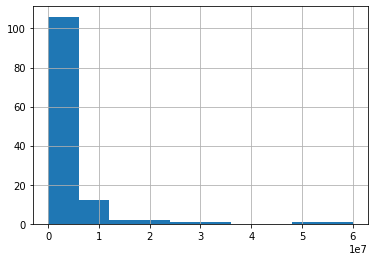

In [143]:
df1 = df_orig.copy()
#df1['other'] = df1['other'].fillna(0)
df1['total_stock_value'] = df1['total_stock_value'].clip(0, 6e7)
#df1['restricted_stock_deferred'] = pd.DataFrame(scalerminmax.fit_transform(pd.DataFrame(df1['restricted_stock_deferred'])), columns=['restricted_stock_deferred'])
#df1['restricted_stock_deferred'] = pd.DataFrame(scalerstandard.fit_transform(pd.DataFrame(df1['restricted_stock_deferred'])), columns=['restricted_stock_deferred'])
#df1['restricted_stock_deferred'] = pd.DataFrame(scalermaxabs.fit_transform(pd.DataFrame(df1['restricted_stock_deferred'])), columns=['restricted_stock_deferred'])
#print(df1['bonus'])
#df1['bonus'] = scalerminmax.fit_transform(df1['bonus'])
#print(df1['expenses'].count())
#print(df1.count())
#print(df1['restricted_stock_deferred'].describe())
df1['total_stock_value'].hist()
#df1['bonus'].hist()

In [75]:
#print(df_train.shape)
#print(df.shape)
print(df1.count())
#print(df.nunique())
#print(df['bonus'].describe())
#print(df['bonus'].value_counts())
#df['bonus'].hist()

name                         146
bonus                         82
deferral_payments             39
deferred_income               49
director_fees                 17
email_address                111
exercised_stock_options      102
expenses                      95
from_messages                 86
from_poi_to_this_person       86
from_this_person_to_poi       86
loan_advances                  4
long_term_incentive           66
other                         93
restricted_stock             110
restricted_stock_deferred     18
salary                        95
shared_receipt_with_poi       86
to_messages                   86
total_payments               125
total_stock_value            126
dtype: int64
